In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LASSO

In [ ]:
# parameters to be tested on GridSearchCV



params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

#GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

In [ ]:
column_names = X.columns.to_list()

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(column_names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 1)
plt.show()

In [ ]:
df_lasso=df[['Income','Loan_Term_Months','Mobile_Phone_Payment_On_Time','Transaction_Behavior_Score','demographics_Urban','profession_Marketer Manager']]

In [ ]:

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(df_lasso, y, test_size=0.2, random_state=0)

# Train XGBoost with selected features from Lasso
xgb_lasso = XGBRegressor(random_state=42)
xgb_lasso.fit(X_train_lasso, y_train_lasso)
y_pred_lasso = xgb_lasso.predict(X_test_lasso)




In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_lasso, y_pred_lasso)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_lasso, y_pred_lasso, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_lasso, y_pred_lasso)
print(f"Mean Absolute Error: {mae}")

Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
f_i = list(zip(column_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
df_rf=df[['Income','Loan_Amount','Rent_Payments','Transaction_Behavior_Score','Social_Media_Activity_Score','Age','Loan_Term_Months']]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_rf, y, test_size=0.2, random_state=0)
# Initialize and train the model

# Train XGBoost with selected features from Lasso
xgb_rf = XGBRegressor(random_state=42)
xgb_rf.fit(X_train_rf, y_train_rf)
y_pred = xgb_rf.predict(X_test_rf)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_rf, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_rf, y_pred)
print(f"Mean Absolute Error: {mae}")

Forward and Backward

In [ ]:
# Initialize the Ridge model
ridge = Ridge()

In [ ]:
# Perform Sequential Feature Selection
sfs_forward = SequentialFeatureSelector(
   ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

In [ ]:
column_names = X.columns.to_list()

In [ ]:
arr = np.array(column_names)

In [ ]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=3, direction="forward"
).fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{arr[sfs_forward.get_support()]}"
)

In [ ]:
df_sfs_forward=df[['Loan_Term_Months','social mediaplatform_Facebook','social mediaplatform_Instagram']]

In [ ]:
X_train_sfs_forward, X_test_sfs_forward, y_train_sfs_forward, y_test_sfs_forward = train_test_split(df_sfs_forward, y, test_size=0.2, random_state=0)

# Train XGBoost with selected features from model
model = XGBRegressor(random_state=42)
model.fit(X_train_sfs_forward, y_train_sfs_forward)
y_pred = model.predict(X_test_sfs_forward)

In [ ]:
mse = mean_squared_error(y_test_sfs_forward, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_sfs_forward, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_sfs_forward, y_pred)
print(f"Mean Absolute Error: {mae}")

Recursive Feature Eimination with Cross-Validation

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
import numpy as np

# Step 1: Initialize the XGBoost model
model = XGBRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Step 2: Initialize GridSearchCV with the model and the parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Step 3: Fit GridSearchCV on the data to find the best parameters
grid_search.fit(X, y)

# Get the best model with optimized hyperparameters
best_model = grid_search.best_estimator_

# Step 4: Initialize RFE with the best model and choose the number of features to select
rfe = RFE(best_model, n_features_to_select=15)

# Step 5: Fit RFE on the data
rfe.fit(X, y)

# Step 6: Get the selected features
X_rfe = rfe.transform(X)

# Step 7: Train the optimized model on the selected features
best_model.fit(X_rfe, y)

# Step 8: Make predictions
y_pred = best_model.predict(X_rfe)

# Step 9: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Best Parameters:", grid_search.best_params_)
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Selected Features: [ True  True  True  True  True False False  True  True False False False
  True  True  True  True  True False  True  True  True]
Mean Squared Error (MSE): 0.07978385805539878
Root Mean Squared Error (RMSE): 0.28246036545929554
Mean Absolute Error (MAE): 0.2455533642132643


old

In [5]:
# Step 1: Initialize the XGBoost model
model = XGBRegressor(random_state=42)

In [6]:
# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(model, n_features_to_select=15)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)


In [7]:
# Step 5: Train the linear model on the selected features
model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = model.predict(X_rfe)

In [8]:
# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Selected Features: [False False  True False  True False  True  True  True  True  True False
  True  True  True  True  True  True  True False  True]
Mean Squared Error (MSE): 0.000550413905803268
Root Mean Squared Error (RMSE): 0.023460901640884733
Mean Absolute Error (MAE): 0.01650674186257892


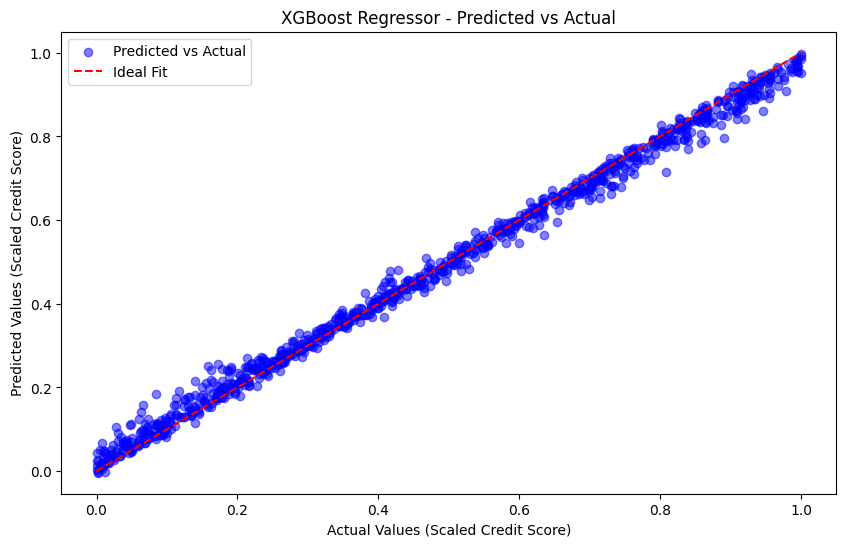

In [9]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("XGBoost Regressor - Predicted vs Actual")
plt.legend()
plt.show()

ANOVA

In [ ]:
column_names=X.columns.to_list()

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=column_names)

In [ ]:
sel = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
selected_features=X_train_df.columns[sel.get_support()]
selected_features

In [ ]:
df_anova = df[selected_features]

In [ ]:
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(df_anova, y, test_size=0.2, random_state=0)

# Train XGBoost with selected features from model
model = XGBRegressor(random_state=42)
model.fit(X_train_anova, y_train_anova)
y_pred = model.predict(X_test_anova)

In [ ]:
mse = mean_squared_error(y_test_anova, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
rmse = mean_squared_error(y_test_anova, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
mae = mean_absolute_error(y_test_anova, y_pred)
print(f"Mean Absolute Error: {mae}")

Mutual Infotmation

In [ ]:
# Calculate mutual information for each feature
mi = mutual_info_regression(X, y)

In [ ]:
# Create a DataFrame to display mutual information values for each feature
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

In [ ]:
# Sort by mutual information score
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [ ]:
# Print the mutual information scores
print(mi_df)

In [ ]:
# You can now select the most informative features based on the MI score
# For example, selecting the top 5 features based on MI
selected_features = mi_df['Feature'].head(5).values

In [ ]:
# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Train XGBoost with selected features from model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')